# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.utils import resample


from sklearn import metrics
from sklearn.model_selection import cross_val_score


from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

In [3]:
!pip install tensorflow
!pip install keras

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, ZeroPadding2D
from tensorflow import keras

In [5]:
### List columns names based on the description
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 
 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 
'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 
'dislocation of', 'exclusion of no', 'no. of nodes in']

In [7]:
lym=pd.read_csv("lymphography (1).csv", names = col_names)
print("Size of dataset:", lym.shape)
lym.head()

Size of dataset: (148, 19)


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [8]:
lym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block of affere  148 non-null    int64
 3   bl. of lymph. c  148 non-null    int64
 4   bl. of lymph. s  148 non-null    int64
 5   by pass          148 non-null    int64
 6   extravasates     148 non-null    int64
 7   regeneration of  148 non-null    int64
 8   early uptake in  148 non-null    int64
 9   lym.nodes dimin  148 non-null    int64
 10  lym.nodes enlar  148 non-null    int64
 11  changes in lym.  148 non-null    int64
 12  defect in node   148 non-null    int64
 13  changes in node  148 non-null    int64
 14  changes in stru  148 non-null    int64
 15  special forms    148 non-null    int64
 16  dislocation of   148 non-null    int64
 17  exclusion of no  148 non-null    int64
 18  no. of nod

In [9]:
lym.isnull().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym.    0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

In [10]:
lym.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


c:\Users\iat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

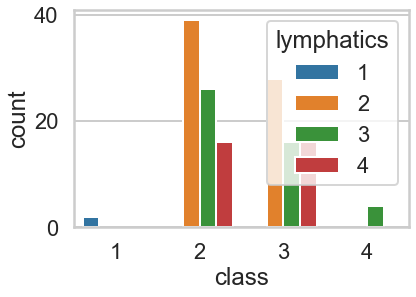

In [11]:
sns.countplot(lym['class'],hue=lym['lymphatics'])

c:\Users\iat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

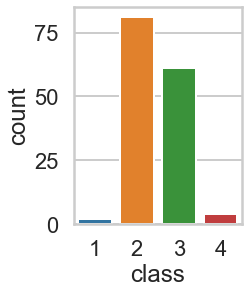

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize = (3,4))
sns.countplot(lym['class'])

In [13]:
x = lym.drop('class', axis=1)
y = lym['class']

In [14]:
x

,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,3,2,1,1,2,2,1,2,1,2,2,4,3,5,2,2,2,4
144,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,2,1
145,2,2,1,1,1,2,1,2,1,3,3,3,3,8,3,2,2,4
146,2,1,1,1,1,1,1,2,1,2,2,4,2,2,1,2,2,1


In [15]:
y

0      3
1      2
2      3
3      3
4      2
      ..
143    3
144    2
145    3
146    2
147    2
Name: class, Length: 148, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(26, input_dim=x_train.shape[1], activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Accuracy  0.7333333333333333
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      0.79      0.79        28
           3       0.62      0.71      0.67        14
           4       1.00      0.50      0.67         2

    accuracy                           0.73        45
   macro avg       0.60      0.50      0.53        45
weighted avg       0.73      0.73      0.73        45



c:\Users\iat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\iat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\iat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels 

<AxesSubplot:>

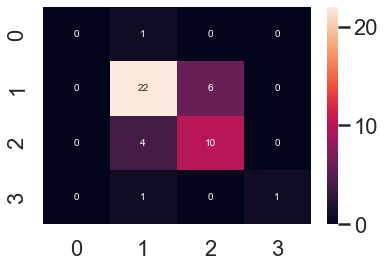

In [19]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [20]:
np.bincount(y_train)

array([ 0,  1, 53, 47,  2], dtype=int64)

In [21]:
!pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [22]:
from tensorflow.keras.layers import Dense #NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [23]:
features = lym.drop(columns=['class'])
target = lym['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [24]:
model = Sequential()

model.add(Dense(100, input_shape=(features.shape[1],)))
model.add(Dense(30, activation="relu"))
# model.add(Dense(45, activation="relu"))
# model.add(Dense(32, activation="relu"))
# model.add(Dense(23, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1900      
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 3)                 93        
                                                                 
Total params: 5,023
Trainable params: 5,023
Non-trainable params: 0
_________________________________________________________________


In [26]:
import tensorflow

In [27]:
X_train.shape, y_train.shape
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 0s/step


array([[0.61132646, 0.34052992, 0.04814363],
       [0.51330245, 0.43671113, 0.04998637],
       [0.38371214, 0.5586763 , 0.05761156],
       [0.41405636, 0.53503144, 0.05091213],
       [0.632485  , 0.31706545, 0.05044959],
       [0.28151557, 0.66908324, 0.04940119],
       [0.35408062, 0.55265933, 0.09326006],
       [0.53943425, 0.4247662 , 0.03579959],
       [0.37271714, 0.5658279 , 0.06145496],
       [0.5993807 , 0.34859002, 0.05202932],
       [0.49950546, 0.46792254, 0.03257202],
       [0.4622977 , 0.4937968 , 0.04390552],
       [0.46149307, 0.5103714 , 0.02813556],
       [0.5643608 , 0.40292037, 0.03271884],
       [0.41024548, 0.55284446, 0.03691003],
       [0.5658883 , 0.36073765, 0.07337411],
       [0.60307217, 0.34955227, 0.04737555],
       [0.48199564, 0.44428566, 0.07371861],
       [0.5805459 , 0.36722383, 0.05223025],
       [0.56086427, 0.3903283 , 0.04880741],
       [0.40722796, 0.4976656 , 0.09510642],
       [0.446988  , 0.51782477, 0.03518723],
       [0.

In [28]:
#Tune the Model using GridSearchCv

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\iat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  "n_splits=%d cannot be greater than the"


In [29]:
print(clf.best_params_)
print(clf.best_score_)

{'classifier': RandomForestClassifier(max_features=11, n_estimators=40), 'classifier__max_features': 11, 'classifier__n_estimators': 40}
0.8683823529411765


In [30]:
X = lym.drop(columns=['class'])
y = lym['class']
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
history = model.fit(X,y,steps_per_epoch=3, epochs=3,validation_steps=5)

Epoch 1/3
3/3 [==============================] - 1s 3ms/step - loss: 4.8469 - accuracy: 0.0338
Epoch 2/3
3/3 [==============================] - 0s 5ms/step - loss: 4.8349 - accuracy: 0.2500
Epoch 3/3
3/3 [==============================] - 0s 4ms/step - loss: 4.8267 - accuracy: 0.0608


In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

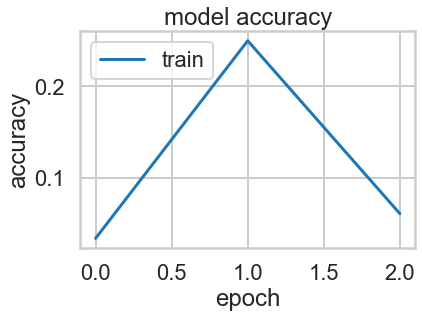

In [32]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

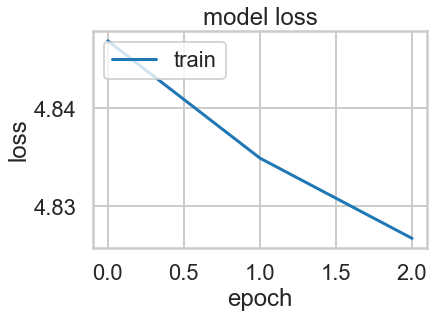

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [34]:
#Saving the model
import pickle
with open('Lymphography_model.pkl', 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://c00d56a5-c861-48ff-ac81-547c6fcebdcf/assets
